In [1]:
import gudhi
import numpy as np

from functions.data_loading import get_filtered_data_range
from functions.data_filtering import complete_flight_filter

from gudhi import AlphaComplex
from datetime import datetime
from traffic.core import Traffic, Flight

In [2]:
origin = "bergen"
destination = "oslo"

filtered_flights: Traffic = get_filtered_data_range(origin, destination, datetime(year=2023, month=1, day=1), datetime(year=2024, month=1, day=1), complete_flight_filter(origin, destination))

In [3]:
def get_flight_points(flight: Flight):
    resampled = flight.data.resample('1s', on="timestamp").first()
    points = resampled[["latitude", "longitude"]].copy()
    points.interpolate(method='linear', inplace=True)
    points = points.dropna()
    return points.to_numpy()

def generate_alpha_tree(flight: Flight):
    points = get_flight_points(flight)
    alpha_complex: gudhi.alpha_complex = AlphaComplex(points=points)
    tree: gudhi.simplex_tree.SimplexTree = alpha_complex.create_simplex_tree()
    tree.compute_persistence()
    return tree

In [4]:
persistences = dict()
for i, flight in enumerate(filtered_flights):
    tree = generate_alpha_tree(filtered_flights[i])
    persistence = tree.persistence()
    more_than_00001 = len(list(filter(lambda x: x[0] == 1 and x[1][1] - x[1][0] > 0.0001, persistence)))
    more_than_00005 = len(list(filter(lambda x: x[0] == 1 and x[1][1] - x[1][0] > 0.0005, persistence)))
    print(f"{i}:\n{more_than_00001}, {more_than_00005}")
    persistences[i] = [more_than_00001, more_than_00005]

0:
0, 0
1:
0, 0
2:
0, 0
3:
0, 0
4:
0, 0
5:
0, 0
6:
0, 0
7:
0, 0
8:
0, 0
9:
0, 0
10:
0, 0
11:
0, 0
12:
0, 0
13:
0, 0
14:
0, 0
15:
0, 0
16:
0, 0
17:
0, 0
18:
0, 0
19:
0, 0
20:
0, 0
21:
0, 0
22:
0, 0
23:
0, 0
24:
0, 0
25:
0, 0
26:
0, 0
27:
0, 0
28:
0, 0
29:
0, 0
30:
0, 0
31:
0, 0
32:
0, 0
33:
0, 0
34:
0, 0
35:
0, 0
36:
0, 0
37:
0, 0
38:
0, 0
39:
0, 0
40:
0, 0
41:
0, 0
42:
0, 0
43:
0, 0
44:
0, 0
45:
0, 0
46:
0, 0
47:
0, 0
48:
0, 0
49:
0, 0
50:
0, 0
51:
0, 0
52:
0, 0
53:
0, 0
54:
0, 0
55:
0, 0
56:
0, 0
57:
0, 0
58:
0, 0
59:
0, 0
60:
0, 0
61:
0, 0
62:
0, 0
63:
0, 0
64:
0, 0
65:
0, 0
66:
0, 0
67:
0, 0
68:
0, 0
69:
0, 0
70:
0, 0
71:
0, 0
72:
0, 0
73:
0, 0
74:
0, 0
75:
0, 0
76:
0, 0
77:
0, 0
78:
0, 0
79:
0, 0
80:
0, 0
81:
0, 0
82:
0, 0
83:
0, 0
84:
0, 0
85:
0, 0
86:
0, 0
87:
0, 0
88:
0, 0
89:
0, 0
90:
0, 0
91:
0, 0
92:
0, 0
93:
0, 0
94:
0, 0
95:
0, 0
96:
0, 0
97:
0, 0
98:
0, 0
99:
0, 0
100:
0, 0
101:
0, 0
102:
0, 0
103:
0, 0
104:
0, 0
105:
0, 0
106:
0, 0
107:
0, 0
108:
0, 0
109:
0, 0
110:
0, 0


In [5]:
for i, j in persistences.items():
    if j[0] != 0:
        print(i)

197
270
295
448
485
762
774
786
828
859
889
968
983
1028
1116
1133
1154
1179
1246
1260
1398
1418
1436
1468
1539
1600
1721
1735
1895
1929
2043
2321
2350
2364
2367
2417
2597
2663
2709
2777
2856
2866
2894
2940
2984
3068
3105
3122
3144
3146


197:
2
1


<Axes: title={'center': 'Persistence barcode'}>

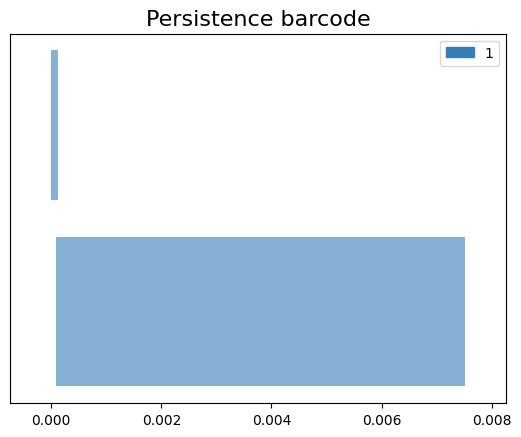

In [16]:
i=197
tree = generate_alpha_tree(filtered_flights[i])
persistence = tree.persistence()
more_than_00001 = len(list(filter(lambda x: x[0] == 1 and x[1][1] - x[1][0] > 0.0001, persistence)))
more_than_00005 = len(list(filter(lambda x: x[0] == 1 and x[1][1] - x[1][0] > 0.0005, persistence)))
print(f"{i}:\n{more_than_00001}\n{more_than_00005}")
gudhi.plot_persistence_barcode(list(filter(lambda x: x[0] == 1 and x[1][1] - x[1][0] > 0.0001, tree.persistence())))

In [7]:
tree.persistence()

[(1, (8.824591408899011e-05, 0.0075094670016651426)),
 (1, (8.331269055960837e-07, 0.0001260880647864972)),
 (1, (1.1575031380412337e-05, 1.2501585986824488e-05)),
 (1, (1.1782008239846783e-05, 1.2287160783560862e-05)),
 (1, (1.1697827318129365e-05, 1.1974863653790388e-05)),
 (1, (1.2254743488731547e-05, 1.24330971334525e-05)),
 (1, (1.2287159719009177e-05, 1.2404524160682198e-05)),
 (1, (4.423677718640391e-07, 5.571426120149874e-07)),
 (1, (2.557197708521848e-07, 3.6872650559560177e-07)),
 (1, (1.008421294000481e-06, 1.1179601522430642e-06)),
 (1, (1.2376129557645377e-05, 1.2478500759428772e-05)),
 (1, (2.858663202754555e-07, 3.7858945577863624e-07)),
 (1, (2.698460787610791e-07, 3.5641216765229253e-07)),
 (1, (2.757641287893685e-07, 3.5124807489330157e-07)),
 (1, (1.221881403092822e-05, 1.2289060956692651e-05)),
 (1, (2.9480801767682e-07, 3.649927808387037e-07)),
 (1, (3.898747968028493e-07, 4.589339330084872e-07)),
 (1, (1.5504310165553575e-07, 2.2027281395578185e-07)),
 (1, (4.2064

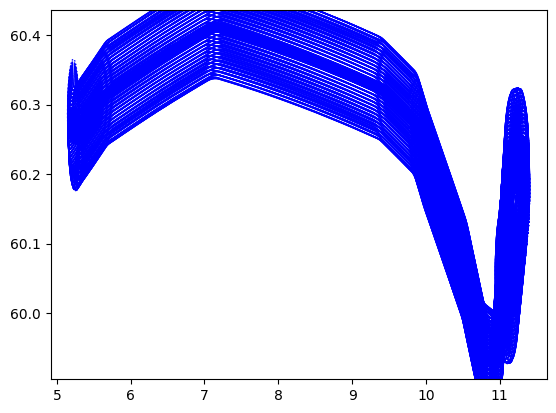

In [13]:
import numpy as np
import matplotlib.pyplot as plt


# Example: points in 2D space
points = np.array(list(zip(longs, lats)))

# Function to plot filtration
def plot_filtration(points, epsilon):
    # Plot points
    plt.scatter(points[:, 0], points[:, 1], color='blue', zorder=2)
    
    # Plot epsilon balls
    for point in points:
        circle = plt.Circle(point, epsilon, color='blue', fill=False, linestyle='dotted')
        plt.gca().add_artist(circle)

    plt.show()

# Example: visualize filtration at epsilon = 0.6
epsilon = 0.075
plot_filtration(points, epsilon)